# LeNet Architecture
- CNN is used to detect patterns in the image, character recognition, object detection, real time movement detection etc.
- LeNet, also referred as LeNet-5 was a research article published in the year 1998.
- LeNet was used primarily for OCR and character recognition in documents.<br><br>

![LeNet Architecture](https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_01.png)

- We have a character 3 shown as the input image. This character has to be recognised through multiple layers. This is proposed by LeNet 1998.
- Primary task of this architecture is given a handwritten character as input, LeNet should correctly cassify it.



In [34]:
# Required Libraries
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)
warnings.filterwarnings("ignore")

2.4.1


In [25]:
# Load Dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training set: {X_train.shape}')
print(f'Testing set: {X_test.shape}')

Training set: (60000, 28, 28)
Testing set: (10000, 28, 28)


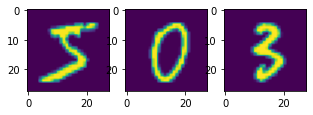

In [26]:
# Plotting sample images of hand written characters using plt.imshow()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))
ax1.imshow(X_train[0]);
ax2.imshow(X_train[1000]);
ax3.imshow(X_train[45000]);

One-hot encode the labels: Converts a class vector (integers) to binary class matrix. This can be converted into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

In [27]:
X_train = tf.pad(tensor=X_train, paddings=[[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(tensor=X_test, paddings=[[0, 0], [2,2], [2,2]])/255

X_train.shape

TensorShape([60000, 32, 32])

CNN’s accept 4-dimensional tensors as inputs having the dimensions of batch size, height, width, and channel. Since MNIST images are grayscale, the last dimension does not necessarily exist. We need to expand the tensor and create a dummy dimension at axis number 3.

In [28]:
X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)
X_train.shape

TensorShape([60000, 32, 32, 1])

In [29]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

`y_train[0]` has a value 1 in the 5th index, which means that this array represents the number 5.

In [30]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Architecture
![Parameters](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/arch.jpg)

In [45]:
# Building the LeNet Model

input_shape = (32, 32, 1)                                                                                                                 # Input is 32X32 with single channel as it is grayscale
model = tf.keras.Sequential()                                                                                                             # Sequential groups a linear stack of layers
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape))              # 1st Convolution layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))                                                             # Average pooling
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1),activation='tanh'))                                       # 2nd Convolution layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))                                                             # Average pooling
model.add(tf.keras.layers.Flatten())                                                                                                      # Flattening of the layer
model.add(tf.keras.layers.Dense(units=120, activation='tanh'))                                                                            # Dense layer
model.add(tf.keras.layers.Flatten())                                                                                                      # Flattening of the layer
model.add(tf.keras.layers.Dense(units=84, activation='tanh'))                                                                             # Dense layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))                                                                          # Output layer
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])                                 # Compiling

In [46]:
# Training the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=0)

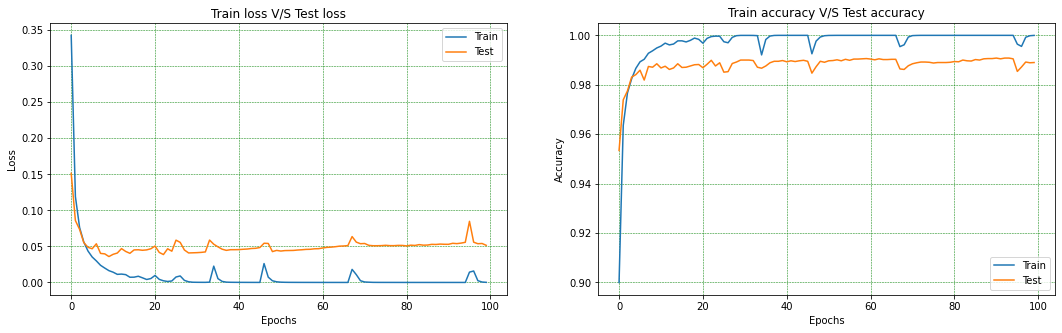

In [54]:
training_history = pd.DataFrame(history.history)
training_history.columns = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']

# Plotting Scores

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

ax1.plot(training_history[['Train Loss', 'Test Loss']]);
ax1.title.set_text('Train loss V/S Test loss')
ax1.set_xlabel('Epochs');
ax1.set_ylabel('Loss');
ax1.legend('best', labels=['Train', 'Test']);
ax1.grid(color = 'green', linestyle = '--', linewidth = 0.5);

ax2.plot(training_history[['Train Accuracy', 'Test Accuracy']]);
ax2.title.set_text('Train accuracy V/S Test accuracy')
ax2.set_xlabel('Epochs');
ax2.set_ylabel('Accuracy');
ax2.legend('best', labels=['Train', 'Test']);
ax2.grid(color = 'green', linestyle = '--', linewidth = 0.5);

In [55]:
# Evaluate the Model on the Test Data
model_performance = model.evaluate(X_test, y_test)
print(f'Test Loss: {round(model_performance[0]*100, 2)}% | Test Accuracy: {round(model_performance[1]*100, 2)}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9890
Test Loss: 5.15% | Test Accuracy: 98.9%


# Predict
- Squeeze the tensor size from (32, 32, 1) to (32, 32) as imshow takes 2D array as input

In [56]:
prediction = model.predict(X_test)

def predict_handwritten_char(index):
  """
  Function to display hand written character and probability scores
  """
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 2))
  x, y = np.arange(0, 10), prediction[index]

  ax1.imshow(tf.squeeze(X_test[index]));
  ax2.bar(x, y);

  ax2.set_xticks(x);
  ax2.set_ylabel('Probability Score');
  ax2.set_xlabel('Hand Written Characters');

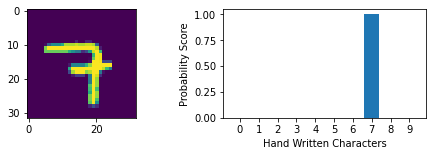

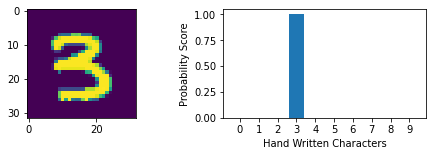

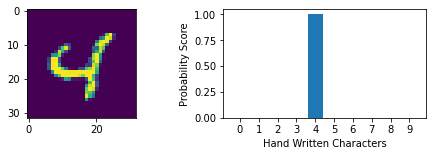

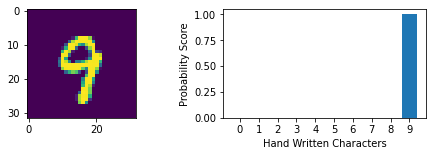

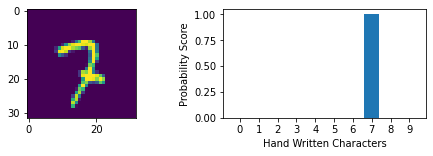

In [60]:
index = [522, 648, 67, 8796, 41]

for i in index:
  predict_handwritten_char(i)

Reference
- https://www.youtube.com/watch?v=PiF0l6xif-k by Dr. Sriram Vasudevan
- https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df by Analytics Vidya
